# Construção da base a partir do JSON

________
_______
_______

In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

In [2]:
# função de exibição 

def show_all(df):
    
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_columns', None)
    
    display(df)
    
    pd.reset_option('display.max_colwidth')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_columns')
    

______

### 1) Leitura dos dados

In [3]:
# lê o arquivo e cria lista com cada json

with open("../data/car_info.json") as f:
    
    json_list = json.load(f)

In [4]:
# identificando quais chaves têm listas como valores
# nestes casos, o json_normalizea falha, por isso é importante identificarmos
# antes pra fazer o flatenning

list_values = []
for item in json_list:
    
    for key in item.keys():

        if type(item[key]) == list:

            # print(key, item[key])
            
            if key not in list_values:
                
                list_values.append(key)
                
    # print("\n", "#"*20, "\n")
    
list_values

[]

In [5]:
# fazendo o flattening dos valores que são listas

for item in json_list:
    
    for key in list_values:

        try:
            for i in range(len(item[key])):

                item[key + "_" + str(i+1)] = item[key][i]
                
            item.pop(key)
        
        except:
            
            pass

In [6]:
# montando o df

df = pd.json_normalize(json_list)

In [7]:
df.shape

(263186, 37)

In [8]:
df.columns.tolist()

['FipePercent',
 'GoodDeal',
 'unico_dono',
 'ipva_pago',
 'aceita_troca',
 'financiado',
 'licenciado',
 'Specification.Title',
 'Specification.Make.Value',
 'Specification.Model.Value',
 'Specification.Version.Value',
 'Specification.YearFabrication',
 'Specification.YearModel',
 'Specification.Odometer',
 'Specification.Transmission',
 'Specification.NumberPorts',
 'Specification.BodyType',
 'Specification.Armored',
 'Specification.Color.Primary',
 'Seller.SellerType',
 'Seller.City',
 'Seller.State',
 'Seller.DealerScore',
 'Seller.CarDelivery',
 'Seller.TrocaComTroco',
 'Prices.Price',
 'Prices.SearchPrice',
 'LongComment',
 'contains_leilao',
 'garantia_fabrica',
 'colecionador',
 'revisoes_concessionaria',
 'revisoes_agenda_carro',
 'pessoas_deficiencia',
 'alienado',
 'VipAutopago',
 'Prices.OldPrice']

In [9]:
show_all(df.head(3))

,FipePercent,GoodDeal,unico_dono,ipva_pago,aceita_troca,financiado,licenciado,Specification.Title,Specification.Make.Value,Specification.Model.Value,Specification.Version.Value,Specification.YearFabrication,Specification.YearModel,Specification.Odometer,Specification.Transmission,Specification.NumberPorts,Specification.BodyType,Specification.Armored,Specification.Color.Primary,Seller.SellerType,Seller.City,Seller.State,Seller.DealerScore,Seller.CarDelivery,Seller.TrocaComTroco,Prices.Price,Prices.SearchPrice,LongComment,contains_leilao,garantia_fabrica,colecionador,revisoes_concessionaria,revisoes_agenda_carro,pessoas_deficiencia,alienado,VipAutopago,Prices.OldPrice
0,91.00,True,True,True,True,False,True,CHEVROLET CELTA 1.0 MPFI SPIRIT 8V FLEX 4P MANUAL,CHEVROLET,CELTA,1.0 MPFI SPIRIT 8V FLEX 4P MANUAL,2008,2009.00,140000.00,Manual,4,Hatchback,N,Preto,PJ,Valinhos,São Paulo (SP),3,True,True,14900.00,14900.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,76.00,NaN,True,True,True,NaN,NaN,LEXUS ES 350 3.5 V6 GASOLINA 4P AUTOMÁTICO,LEXUS,ES 350,3.5 V6 GASOLINA 4P AUTOMÁTICO,2016,2017.00,14892.00,Automática,4,Sedã,N,Azul,PJ,Rio de Janeiro,Rio de Janeiro (RJ),0,False,False,124400.00,124400.00,"Carro será periciado na finalização do processo, o que garante que é livre de sinistros ou passagem por leilão.",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,86.00,True,True,True,True,NaN,NaN,HYUNDAI HB20S 1.0 COMFORT PLUS 12V FLEX 4P MANUAL,HYUNDAI,HB20S,1.0 COMFORT PLUS 12V FLEX 4P MANUAL,2014,2014.00,71226.00,Manual,4,Sedã,N,Cinza,PJ,Rio de Janeiro,Rio de Janeiro (RJ),0,False,False,30500.00,30500.00,"Carro será periciado na finalização do processo, o que garante que é livre de sinistros ou passagem por leilão.",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


_______

### 2) Pré-processamento

In [10]:
keep = ["GoodDeal", "HotDeal_1.Value", "Prices.OldPrice", "VipAutopago"]

In [11]:
# colunas com dados missing

missing = df.isnull().sum()[df.isnull().sum().apply(lambda x: True if x!=0 else False)]

# normalizando
missing = (missing/df.shape[0])

missing.apply(lambda x: str(round(x*100, 2)) + "%" if x != 0 else "-")

FipePercent                    5.77%
GoodDeal                      90.37%
unico_dono                     1.13%
ipva_pago                      1.45%
aceita_troca                   3.03%
financiado                    54.64%
licenciado                    54.64%
Specification.Transmission      0.0%
Specification.BodyType         0.01%
Seller.City                     0.0%
LongComment                   11.83%
contains_leilao               11.84%
garantia_fabrica              77.94%
colecionador                  83.02%
revisoes_concessionaria       83.02%
revisoes_agenda_carro         91.27%
pessoas_deficiencia           98.85%
alienado                      98.85%
VipAutopago                   99.95%
Prices.OldPrice               99.01%
dtype: object

In [12]:
# vamos dropar as colunas que tenham mais que 50% de NaNs

threshold_drop = 0.5

print("\nThreshold: " + str(threshold_drop*100) + "%\n")
display(missing[missing>threshold_drop])

drop_nans = missing[missing>threshold_drop].index.tolist()

# dropando!
df = df.drop(columns=drop_nans)


Threshold: 50.0%



GoodDeal                  0.90
financiado                0.55
licenciado                0.55
garantia_fabrica          0.78
colecionador              0.83
revisoes_concessionaria   0.83
revisoes_agenda_carro     0.91
pessoas_deficiencia       0.99
alienado                  0.99
VipAutopago               1.00
Prices.OldPrice           0.99
dtype: float64

In [13]:
# renomeando colunas

rename_dic = {'LongComment' : 'comentario',
                'FipePercent' : 'fipe_perc',
                'Specification.Title' : 'titulo_anuncio',
                'Specification.Make.Value' : 'marca',
                'Specification.Model.Value' : 'modelo',
                'Specification.Version.Value' : 'versao',
                'Specification.YearFabrication' : 'ano',
                'Specification.YearModel' : 'ano_modelo',
                'Specification.Odometer' : 'km',
                'Specification.Transmission' : 'transmissao',
                'Specification.NumberPorts' : 'num_portas',
                'Specification.VehicleAttributes' : 'atributos',
                'Specification.BodyType' : "categoria",
                'Specification.Armored' : 'blindado',
                'Specification.Color.Primary' : 'cor',
                'Seller.SellerType' : 'vendedor_tipo',
                'Seller.City' : 'vendedor_cidade',
                'Seller.State' : 'vendedor_estado',
                'Seller.AdType.Value' : 'tipo_anuncio',
                'Seller.CarDelivery' : 'car_delivery',
                'Seller.TrocaComTroco' : 'troca_troco',
                'Prices.Price' : 'preco',
                'Prices.SearchPrice' : 'preco_busca',
                'Seller.DealerScore' : 'score_vendedor',   
              
                # apagar do json
                "Channels_2.id": "a",
                "Channels_2.Value": "a",
                "HotDeal_1.Id": "a",
                'UniqueId' : 'UniqueId',
                'ProductCode' : 'ProductCode',                
                'Specification.Make.id' : 'Specification.Make.id',
                'Specification.Model.id' : 'Specification.Model.id',
                'Specification.Version.id' : 'Specification.Version.id',
                'Specification.Color.IdPrimary' : 'Specification.Color.IdPrimary',
                'Seller.Id' : 'Seller.Id',                
                'Seller.AdType.id' : 'Seller.AdType.id',                
                'Seller.BudgetInvestimento' : 'Seller.BudgetInvestimento',             
                'Channels_1.id' : 'Channels_1.id',
                'Channels_1.Value' : 'Channels_1.Value'}

df = df.rename(columns=rename_dic)

cols_select = ['titulo_anuncio','marca','modelo','versao','ano','ano_modelo','km',
               'preco','preco_busca','fipe_perc',
               'cor', 'categoria', 'transmissao','num_portas',
               # 'atributos',
               'comentario','blindado',
               'vendedor_tipo','vendedor_cidade','vendedor_estado', 'score_vendedor', 
               # 'tipo_anuncio',
               'car_delivery','troca_troco']

df = df[cols_select]

In [14]:
# isso vai auxiliar na correção dos dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263186 entries, 0 to 263185
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   titulo_anuncio   263186 non-null  object 
 1   marca            263186 non-null  object 
 2   modelo           263186 non-null  object 
 3   versao           263186 non-null  object 
 4   ano              263186 non-null  object 
 5   ano_modelo       263186 non-null  float64
 6   km               263186 non-null  float64
 7   preco            263186 non-null  float64
 8   preco_busca      263186 non-null  float64
 9   fipe_perc        248004 non-null  float64
 10  cor              263186 non-null  object 
 11  categoria        263170 non-null  object 
 12  transmissao      263185 non-null  object 
 13  num_portas       263186 non-null  object 
 14  comentario       232040 non-null  object 
 15  blindado         263186 non-null  object 
 16  vendedor_tipo    263186 non-null  obje

In [15]:
# ajustando dtypes

df["ano"] = df["ano"].apply(lambda x: int(x))


df["ano_modelo"] = df["ano_modelo"].apply(lambda x: int(x))


df["num_portas"] = df["num_portas"].apply(lambda x: int(x))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263186 entries, 0 to 263185
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   titulo_anuncio   263186 non-null  object 
 1   marca            263186 non-null  object 
 2   modelo           263186 non-null  object 
 3   versao           263186 non-null  object 
 4   ano              263186 non-null  int64  
 5   ano_modelo       263186 non-null  int64  
 6   km               263186 non-null  float64
 7   preco            263186 non-null  float64
 8   preco_busca      263186 non-null  float64
 9   fipe_perc        248004 non-null  float64
 10  cor              263186 non-null  object 
 11  categoria        263170 non-null  object 
 12  transmissao      263185 non-null  object 
 13  num_portas       263186 non-null  int64  
 14  comentario       232040 non-null  object 
 15  blindado         263186 non-null  object 
 16  vendedor_tipo    263186 non-null  obje

In [17]:
df["atributos"]

KeyError: 'atributos'

In [ ]:
# processando a coluna "atributos", que veio como uma lista de dics

print("\nOriginalmente:")
display(df["atributos"].head())

df["atributos"] = df["atributos"].apply(lambda x: 
                                        " | ".join(sorted(["_".join(list(item.values())) for item in x])) if type(x) == list
                                        else x)

print("\nDepois:")
display(df["atributos"].head())

In [ ]:
 df[df["ano"] < 1970]

In [ ]:
# tirando outliers absurdos (provabelmente foi erro de cadastro) quanto ao preço

df = df[df["preco"] < 1e8]

In [ ]:
show_all(df.head())

_______

### 3) Análise preliminar - marcas e modelos

In [ ]:
# dic de dfs pra cada marca

marcas = df["marca"].unique().tolist()

df_marcas = {marca: df[df["marca"] == marca] for marca in marcas}

In [ ]:
# dic com a seguinte estrutura: {"MARCA": {"MODELO_i":df_modelo_i.describe()}}

modelos_describe = {marca : 
                       {modelo: df_marcas[marca][df_marcas[marca]["modelo"] == modelo].describe() 
                        for modelo in df_marcas[marca]["modelo"].unique().tolist()}
                    for marca in marcas}

In [ ]:
print(marcas)

In [ ]:
modelos_describe["HYUNDAI"].keys()

In [ ]:
modelos_describe["HYUNDAI"]['HB20']

In [ ]:
marca_modelo_ano = {marca : 
                       {modelo: df_marcas[marca][df_marcas[marca]["modelo"] == modelo].groupby(["ano",
                                                                                                "versao"])[["km",
                                                                                                           "preco",
                                                                                                           "fipe_perc"]].agg(["count", 
                                                                                                                              "mean",
                                                                                                                              "min",
                                                                                                                              "max",
                                                                                                                              np.median]) 
                        for modelo in df_marcas[marca]["modelo"].unique().tolist()}
                    for marca in marcas}

In [ ]:
marca_modelo_ano["HYUNDAI"]['HB20']

# TODO: exportar um excel com as 10 maiores "distorções", pra cada uma das marcas grandes

agrupar por: marca, ano, modelo. (opcionlamnete, agruparia 1.0, 1.6)

colunas: marca, ano, carro, preco, km, indicativo de leilão, fipe_perc, perc_media 


In [172]:
df["fipe_perc"].describe()

count    9607.00
mean      113.76
std       993.02
min        59.00
25%        96.00
50%       101.00
75%       107.00
max     97365.00
Name: fipe_perc, dtype: float64

<AxesSubplot:xlabel='fipe_perc', ylabel='Count'>

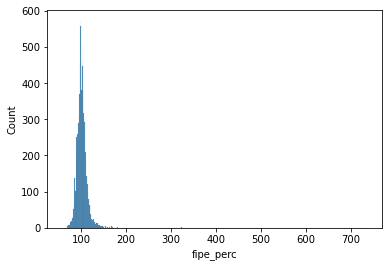

In [173]:
sns.histplot(df[df["fipe_perc"] < 1000]["fipe_perc"])

In [175]:
df["fipe_perc"].quantile(0.1)

90.0

In [176]:
df.shape

(10008, 24)

In [180]:
show_all(df.sort_values("fipe_perc", ascending=True).iloc[20:30])

,titulo_anuncio,marca,modelo,versao,ano,ano_modelo,km,preco,preco_busca,fipe_perc,cor,categoria,transmissao,num_portas,atributos,comentario,blindado,vendedor_tipo,vendedor_cidade,vendedor_estado,score_vendedor,tipo_anuncio,car_delivery,troca_troco
5636,LAND ROVER DISCOVERY SPORT 2.0 16V TD4 TURBO DIESEL SE 4P AUTOMÁTICO,LAND ROVER,DISCOVERY SPORT,2.0 16V TD4 TURBO DIESEL SE 4P AUTOMÁTICO,2016,2016,162000.00,110000.00,110000.00,73.00,Cinza,Utilitário esportivo,Automática,4,IPVA pago | Licenciado,Proveniente de leilão Média monta .\nConsta no documento recuperado .\n\n\nValor para venda rápida .\nNão faço por 100.000\n\nAceito troca em porsche macan acima de 2017.\nMeu contato esta na 1 foto .\n,N,PF,São Paulo,São Paulo (SP),0,Pessoa Física,False,False
3169,VOLKSWAGEN KOMBI 1.4 MI STD LOTAÇÃO 8V FLEX 3P MANUAL,VOLKSWAGEN,KOMBI,1.4 MI STD LOTAÇÃO 8V FLEX 3P MANUAL,2008,2009,314000.00,16000.00,16000.00,73.00,Branco,Van/Utilitário,Manual,3,Aceita troca | IPVA pago | Licenciado | Único dono,"### ATENÇÃO ###\n\nVENDENDO POR R$ 12.000,00\n\nnão foi possível cadastrar esse valor no anúncio.",N,PF,Aracruz,Espírito Santo (ES),0,Pessoa Física,False,False
399,HYUNDAI HB20 1.0 COMFORT PLUS 12V FLEX 4P MANUAL,HYUNDAI,HB20,1.0 COMFORT PLUS 12V FLEX 4P MANUAL,2018,2018,100.00,29990.00,29990.00,73.00,Branco,Hatchback,Manual,4,Aceita troca,"Planos especiais para AUTÔNOMO sem comprovação de renda. Seu veículo na troca serve como ENTRADA ou como DINHEIRO NA MÃO! Veículos REVISADOS com garantia e com procedência garantida. Taxa a partir de 0,89% ao mês. Preço válido para financiamento JUNTO À LOJA + pequena ENTRADA.",N,PJ,São João de Meriti,Rio de Janeiro (RJ),4,Loja,False,True
802,MERCEDES-BENZ S 500 5.0 SEDAN V8 GASOLINA 4P AUTOMÁTICO,MERCEDES-BENZ,S 500,5.0 SEDAN V8 GASOLINA 4P AUTOMÁTICO,2005,2006,91000.00,97990.00,97990.00,73.00,Preto,Sedã,Automática,4,Aceita troca | IPVA pago | Licenciado,"Impecável,Maravilhoso, Kit multimídia, Geladeira de bordo,todos os bancos elétricos, suspensão pneumática, Computador de bordo digital, 4 Pneus novos!!! \nVEÍCULOS COM PROCEDENCIA, REVISADOS, PERICIADOS CAUTELARMENTE, "" NAO "" ACEITAMOS LAUDO CAUTELAR COM RESTRICAO OU OBSERVACAO. SOMENTE COMPRAMOS VEICULOS CONSTATADA ORIGEM ...\n\n"" NAO "" TRABALHAMOS DE FORMA NENHUMA COM VEICULOS DE LEILAO , NEM TAMPOUCO DE SEGURADORAS ...\n\nTODOS OS PAGAMENTOS DEVEM SER FEITOS NA CONTA DE NOSSA EMPRESA ( NOSSO CNPJ ) ...\n\n RESERVAMO-NOS AO DIREITO DE ERROS DE DIGITAÇAO E ALTERACAO DE PREÇO E OPCIONAIS NO DECORRER DO DIA .",N,PJ,Campinas,São Paulo (SP),3,Loja,True,False
2915,CITROËN XSARA PICASSO 2.0 I GLX 16V GASOLINA 4P AUTOMÁTICO,CITROËN,XSARA PICASSO,2.0 I GLX 16V GASOLINA 4P AUTOMÁTICO,2008,2009,160000.00,14500.00,14500.00,74.00,Preto,Minivan,Automática,4,Aceita troca | IPVA pago | Licenciado,"Carro com uma batida na frente e bancos da frente precisando arrumar o couro. Aceita troca e negocia o valor anúnciado. Tirando batida e os bancos em perfeito estado, do mesmo dono a 7 anos.",N,PF,São Paulo,São Paulo (SP),0,Pessoa Física,False,False
3808,RENAULT LOGAN 1.0 EXPRESSION 16V FLEX 4P MANUAL,RENAULT,LOGAN,1.0 EXPRESSION 16V FLEX 4P MANUAL,2013,2013,283000.00,17000.00,17000.00,74.00,Branco,Sedã,Manual,4,Aceita troca | IPVA pago | Licenciado | Único dono,"EXCELENTE OPORTUNIDADE. RENAULT LOGAN EXP 1.0 16V COMPLETO, INCLUSIVE COM FARÓIS DE MILHA ORIGINAL. CARRO TODO REVISADO.DOCUMENTAÇÃO EM ORDEM, SEM RESTRIÇÃO E LICENCIADO 2019, APENAS CUSTO DE TRANSFERÊNCIA PARA COMPRADOR. VALOR BEM ABAIXO DA TABELA. REPITO : EXCELENTE OPORTUNIDADE EM RELAÇÃO CUSTO X BENEFICIO, CARRO SUPER ECONÔMICO COM PORTA MALAS E ESPAÇO INTERNO ENORMES. ACEITO PROPOSTAS. Contato para informações: 11-3221.21.26 ou 11-996209335.",N,PF,São Paulo,São Paulo (SP),0,Pessoa Física,False,False
557,VOLKSWAGEN FOX 1.0 MI PLUS 8V FLEX 4P MANUAL,VOLKSWAGEN,FOX,1.0 MI PLUS 8V FLEX 4P MANUAL,2006,2006,200000.00,12000.00,12000.00,74.00,Prata,Hatchback,Manual,0,Aceita troca | IPVA pago | Licenciado,"Carro do dia

In [185]:
df.groupby("marca")[["fipe_perc"]].agg(["mean", "median", "count"])

fipe_perc             
                     mean median count
marca                                 
ALFA ROMEO         234.00 229.00     3
AUDI               425.92 100.00   301
BENTLEY               nan    nan     0
BMW                102.99 101.00   439
CADILLAC              nan    nan     0
CHERY              105.08 104.00    37
CHEVROLET          107.02 103.00   992
CHRYSLER            98.48  98.00    23
CITROËN             96.41  97.00   364
DODGE               99.57  98.00    37
FERRARI            137.71 138.00     7
FIAT               101.71 100.00   705
FORD               103.16 100.00   765
FOTON              103.00 103.00     1
GEELY              100.00 100.00     1
GURGEL             153.50 153.50     2
HONDA              107.47 106.00   333
HUMMER                nan    nan     0
HYUNDAI            104.58 103.00   488
INFINITI              nan    nan     0
JAC                 97.45  97.00    31
JAGUAR             103.92 102.00    60
JEEP               104.13 102.50   448
JINBEI              72.00  72.00     1
KIA                104.09 103.00   205
LADA                88.00  88.00     1
LAMBORGHINI        114.80 108.00     5
LAND ROVER         102.50 101.00   485
LEXUS              100.08 100.00    39
LIFAN               96.58  98.00    19
LINCOLN               nan    nan     0
MASERATI           110.40 102.00     5
MAZDA              174.00 174.00     1
MCLAREN             99.00  99.00     2
MERCEDES-BENZ      103.78 101.00   393
MINI               107.86 104.50    66
MITSUBISHI         104.45 101.50   244
NISSAN             103.10 102.00   261
PEUGEOT             95.28  95.00   354
PLYMOUTH              nan    nan     0
PORSCHE            112.25 109.00   109
RELY                98.00  98.00     1
RENAULT             94.89  93.00   673
SMART              138.00 138.00     1
SSANGYONG          101.60 103.00     5
SUBARU             100.60 100.00    20
SUZUKI             103.79 103.00    24
TESLA                 nan    nan     0
TOYOTA             104.92 104.00   380
TROLLER            121.50 112.00    16
VOLKSWAGEN         109.75 103.00  1140
VOLVO              100.67  99.00   120
WILLYS                nan    nan     0
WILLYS OVERLAND       nan    nan     0

In [150]:
df.head()

,titulo_anuncio,marca,modelo,versao,ano,ano_modelo,km,preco,preco_busca,fipe_perc,...,atributos,comentario,blindado,vendedor_tipo,vendedor_cidade,vendedor_estado,score_vendedor,tipo_anuncio,car_delivery,troca_troco
0,LAND ROVER RANGE ROVER SPORT 3.0 HSE 4X4 V6 24...,LAND ROVER,RANGE ROVER SPORT,3.0 HSE 4X4 V6 24V TURBO DIESEL 4P AUTOMÁTICO,2014,2014,50000.00,279900.00,279900.00,123.00,...,Garantia de fábrica | IPVA pago | Licenciado |...,Veículo impecável. \n\núnico dono.,S,PF,Santana de Parnaíba,São Paulo (SP),0,Pessoa Física,False,False
1,JAGUAR XF 2.0 LUXURY TURBOCHARGED GASOLINA 4P ...,JAGUAR,XF,2.0 LUXURY TURBOCHARGED GASOLINA 4P AUTOMÁTICO,2014,2015,44000.00,105000.00,105000.00,87.00,...,Aceita troca | IPVA pago | Licenciado | Todas ...,NaN,N,PF,São Paulo,São Paulo (SP),0,Pessoa Física,False,False
2,PEUGEOT 208 1.6 GRIFFE 16V FLEX 4P AUTOMÁTICO,PEUGEOT,208,1.6 GRIFFE 16V FLEX 4P AUTOMÁTICO,2014,2014,36000.00,26000.00,26000.00,72.00,...,IPVA pago | Licenciado | Único dono,O valor do veículo no estado em que se encontr...,N,PF,Campinas,São Paulo (SP),0,Pessoa Física,False,False
3,MERCEDES-BENZ C 250 2.0 CGI SPORT TURBO 16V GA...,MERCEDES-BENZ,C 250,2.0 CGI SPORT TURBO 16V GASOLINA 4P AUTOMÁTICO,2015,2016,46210.00,149900.00,149900.00,105.00,...,Aceita troca | Garantia de fábrica | Licenciad...,"Aceito troca, Air bag duplo, Ar condicionado d...",N,PJ,Rio de Janeiro,Rio de Janeiro (RJ),0,Concessionária,True,False
4,CITROËN C4 LOUNGE 1.6 THP FLEX FEEL BVA,CITROËN,C4 LOUNGE,1.6 THP FLEX FEEL BVA,2018,2019,16000.00,62000.00,62000.00,79.00,...,Garantia de fábrica | Licenciado | Todas as re...,"Garantia até maio 2021.\nCouro, câmera de ré....",N,PF,Caxambu,Minas Gerais (MG),0,Pessoa Física,False,False


<Figure size 1152x576 with 0 Axes>

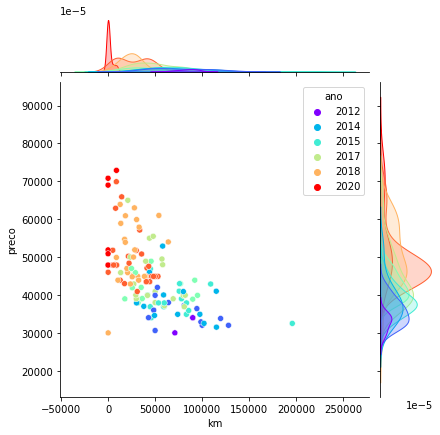

In [145]:
aux = df_marcas["HYUNDAI"][df_marcas["HYUNDAI"]["modelo"] == "HB20"]

aux = aux[aux["km"] < 5e5]

plt.figure(figsize=(16, 8))

sns.jointplot(data=aux, y="preco", x="km", hue="ano", palette="rainbow")

plt.show()

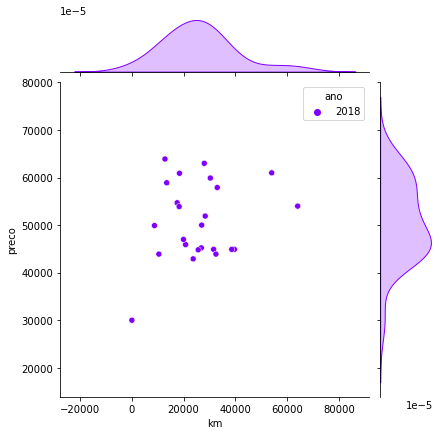

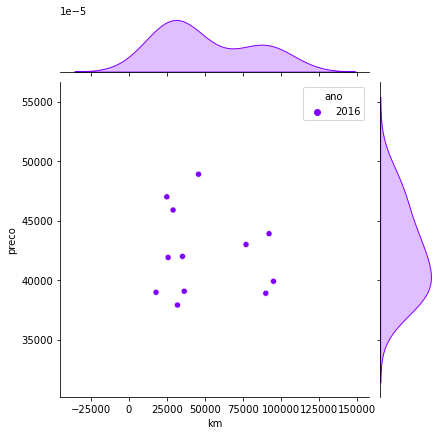

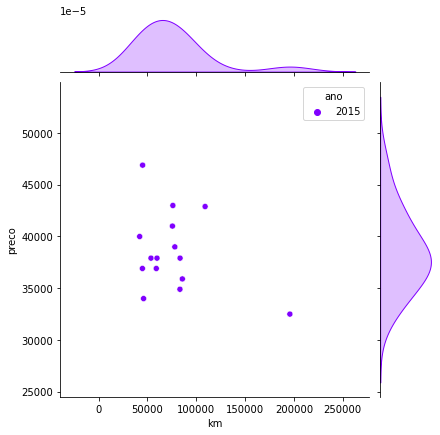

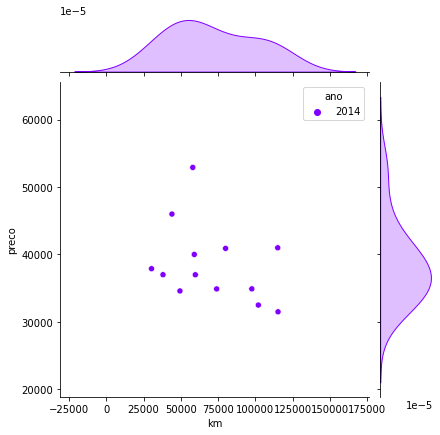

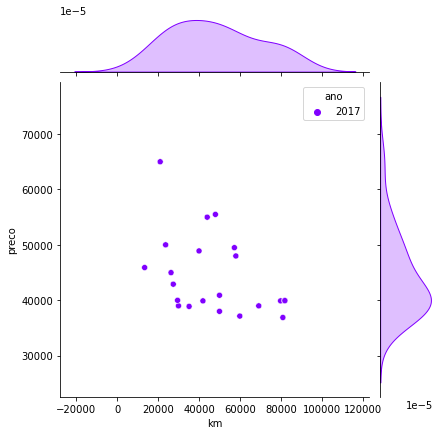

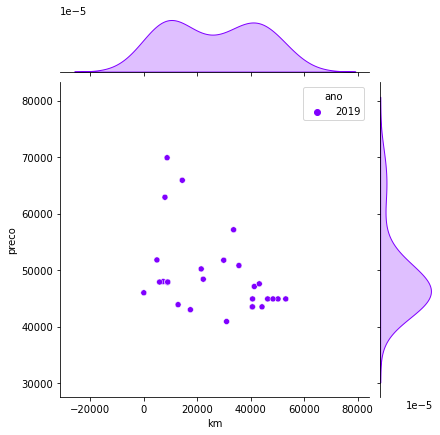

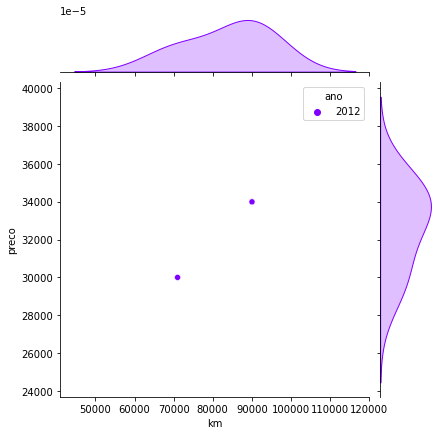

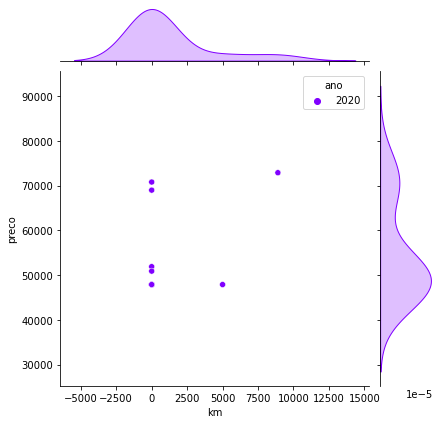

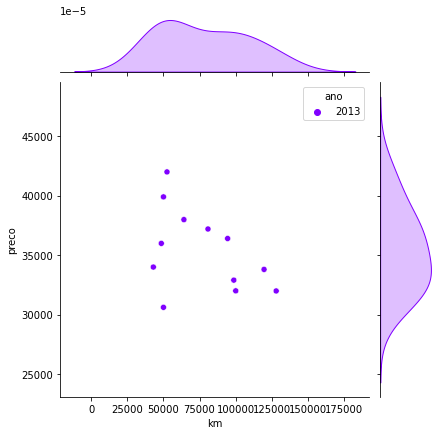

In [148]:
for ano in aux["ano"].unique():
    
    aux2 = aux[aux["ano"] == ano]
    
    sns.jointplot(data=aux2, y="preco", x="km", hue="ano", palette="rainbow")
    
    plt.show()

In [140]:
aux[(aux["km"] < 10000) & (aux["preco"] <40000)] 

,titulo_anuncio,marca,modelo,versao,ano,ano_modelo,km,preco,preco_busca,fipe_perc,...,num_portas,atributos,comentario,blindado,vendedor_tipo,vendedor_cidade,vendedor_estado,tipo_anuncio,car_delivery,troca_troco
399,HYUNDAI HB20 1.0 COMFORT PLUS 12V FLEX 4P MANUAL,HYUNDAI,HB20,1.0 COMFORT PLUS 12V FLEX 4P MANUAL,2018,2018,100.00,29990.00,29990.00,73.00,...,4,Aceita troca,Planos especiais para AUTÔNOMO sem comprovação...,N,PJ,São João de Meriti,Rio de Janeiro (RJ),Loja,False,True


______

### 4) Análise por faixas

In [22]:
# para auxiliar a definir as faixas...

df[["preco", "km", "ano"]].describe()

,preco,km,ano
count,10007.00,10007.00,10007.00
mean,94730.33,64497.29,2014.73
std,156639.27,55329.91,4.81
min,6000.00,0.00,1951.00
25%,40000.00,30000.00,2012.00
50%,62000.00,50000.00,2016.00
75%,98945.00,90000.00,2018.00
max,4750000.00,999999.00,2021.00


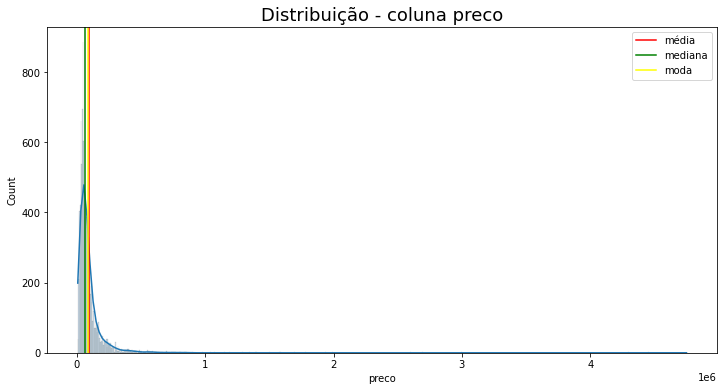

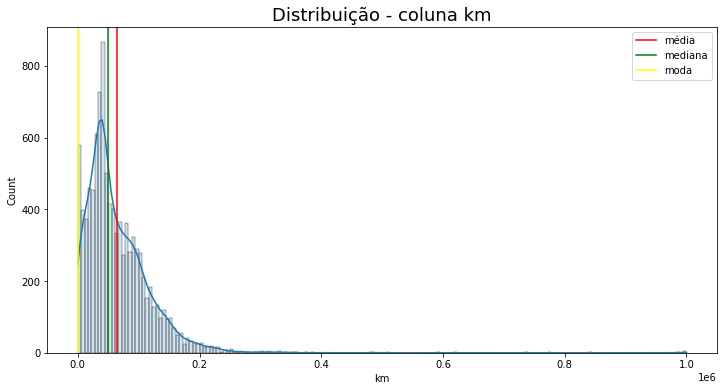

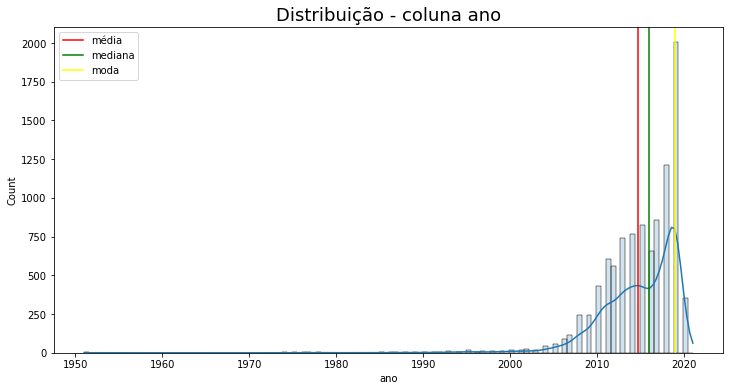

In [23]:
for col in ["preco", "km", "ano"]:
    
    plt.figure(figsize=(12, 6))

    plt.title("Distribuição - coluna " + col , size=18)

    sns.histplot(df[col], kde=True, alpha=0.2)

    # plotando média
    plt.axvline(x=df[col].mean(), color="red", label="média")

    # plotando a mediana
    plt.axvline(x=df[col].median(), color="green", label="mediana")

    # plotando a(s) moda(s)
    for i in range(df[col].mode().shape[0]):

        plt.axvline(x=df[col].mode()[i], color="yellow", label="moda")

    plt.legend()
    plt.show()

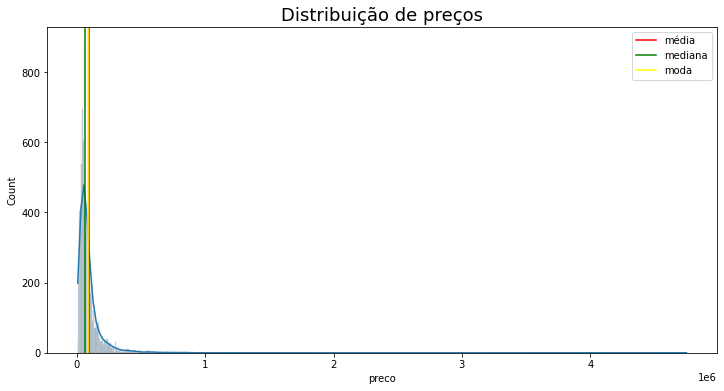

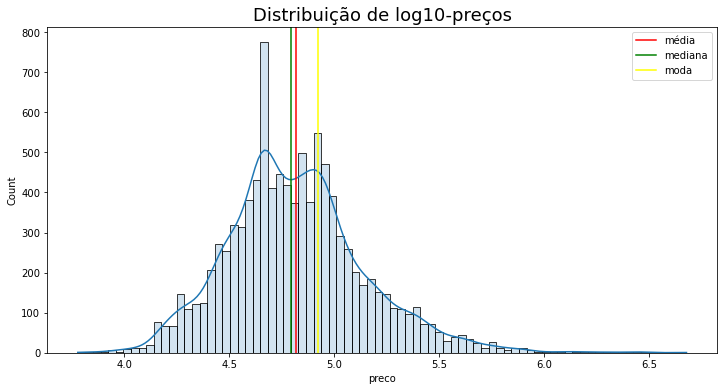

In [24]:
col = "preco"

plt.figure(figsize=(12, 6))

plt.title("Distribuição de preços" , size=18)

sns.histplot(df[col], kde=True, alpha=0.2)

# plotando média
plt.axvline(x=df[col].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(x=df[col].median(), color="green", label="mediana")

# plotando a(s) moda(s)
for i in range(df[col].mode().shape[0]):

    plt.axvline(x=df[col].mode()[i], color="yellow", label="moda")

plt.legend()
plt.show()

############################################

plt.figure(figsize=(12, 6))

plt.title("Distribuição de log10-preços" , size=18)

sns.histplot(np.log10(df[col]), kde=True, alpha=0.2)

# plotando média
plt.axvline(x=np.log10(df[col]).mean(), color="red", label="média")

# plotando a mediana
plt.axvline(x=np.log10(df[col]).median(), color="green", label="mediana")

# plotando a(s) moda(s)
for i in range(np.log10(df[col]).mode().shape[0]):

    plt.axvline(x=np.log10(df[col]).mode()[i], color="yellow", label="moda")

plt.legend()
plt.show()

## 5) EDO

Marca, modelo, ano

elimina outliers -- 3, 4, 5 std. km

ipva pago, revisão: importante

aí, olha pra tabela fipe



In [158]:
df[df["ano"] == 2012]

,titulo_anuncio,marca,modelo,versao,ano,ano_modelo,km,preco,preco_busca,fipe_perc,...,atributos,comentario,blindado,vendedor_tipo,vendedor_cidade,vendedor_estado,score_vendedor,tipo_anuncio,car_delivery,troca_troco
9,LAND ROVER FREELANDER 2 2.2 HSE SD4 16V TURBO ...,LAND ROVER,FREELANDER 2,2.2 HSE SD4 16V TURBO DIESEL 4P AUTOMÁTICO,2012,2012,89000.00,75000.00,75000.00,100.00,...,Aceita troca | IPVA pago | Licenciado | Todas ...,blindagem nível 3A GARANTIA DE 5 ANOS DOS VIDR...,S,PF,São Paulo,São Paulo (SP),0,Pessoa Física,False,False
11,HONDA CIVIC 1.8 LXL 16V FLEX 4P MANUAL,HONDA,CIVIC,1.8 LXL 16V FLEX 4P MANUAL,2012,2012,57735.00,37300.00,37300.00,85.00,...,Aceita troca | IPVA pago | Licenciado | Único ...,NaN,N,PF,São Paulo,São Paulo (SP),0,Pessoa Física,False,False
13,HYUNDAI GENESIS 3.8 V6 24V GASOLINA 4P AUTOMÁTICO,HYUNDAI,GENESIS,3.8 V6 24V GASOLINA 4P AUTOMÁTICO,2012,2013,40000.00,69500.00,69500.00,91.00,...,Aceita troca | IPVA pago | Licenciado | Todas ...,NaN,N,PF,São Paulo,São Paulo (SP),0,Pessoa Física,False,False
66,VOLKSWAGEN SPACEFOX 1.6 MI TREND 8V FLEX 4P MA...,VOLKSWAGEN,SPACEFOX,1.6 MI TREND 8V FLEX 4P MANUAL,2012,2012,80000.00,26500.00,26500.00,90.00,...,IPVA pago | Único dono,NaN,N,PF,Campo Grande,Mato Grosso do Sul (MS),0,Pessoa Física,False,False
68,CITROËN C3 1.4 I GLX 8V FLEX 4P MANUAL,CITROËN,C3,1.4 I GLX 8V FLEX 4P MANUAL,2012,2012,75875.00,16500.00,16500.00,77.00,...,IPVA pago | Licenciado,Comprado no leilão Copart em 2018. Média monta...,N,PF,São Paulo,São Paulo (SP),0,Pessoa Física,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,MASERATI QUATTROPORTE 4.7 S V8 32V GASOLINA 4P...,MASERATI,QUATTROPORTE,4.7 S V8 32V GASOLINA 4P AUTOMÁTICO,2012,2013,14900.00,370000.00,370000.00,98.00,...,Aceita troca | Garantia de fábrica | IPVA pago...,SUPER NOVA E TEM PASSAGEM DE LEILÃO DE FINANCE...,S,PF,Belo Horizonte,Minas Gerais (MG),0,Pessoa Física,False,False
9951,TOYOTA HILUX SW4 3.0 SRV 4X4 7 LUGARES 16V TUR...,TOYOTA,HILUX SW4,3.0 SRV 4X4 7 LUGARES 16V TURBO INTERCOOLER DI...,2012,2013,129700.00,128900.00,128900.00,108.00,...,Aceita troca,"\n Mais opcionais: \n7 lugares , Air Bag Duplo...",N,PJ,São José,Santa Catarina (SC),3,Loja,True,True
9983,FORD ECOSPORT 2.0 XLT 16V FLEX 4P AUTOMÁTICO,FORD,ECOSPORT,2.0 XLT 16V FLEX 4P AUTOMÁTICO,2012,2012,130000.00,32200.00,32200.00,96.00,...,IPVA pago | Licenciado | Todas as revisões fei...,"Carro 100%, todo revisado, pneus semi-novos, n...",N,PF,São Paulo,São Paulo (SP),0,Pessoa Física,False,False
9997,CHEVROLET SPIN 1.8 LT 8V FLEX 4P AUTOMÁTICO,CHEVROLET,SPIN,1.8 LT 8V FLEX 4P AUTOMÁTICO,2012,2013,97000.00,34990.00,34990.00,102.00,...,Aceita troca,NaN,N,PJ,São Caetano do Sul,São Paulo (SP),3,Loja,True,True


In [190]:
df[(df["preco"] < 80e3) & 
   (~df["marca"].isin(["RENAULT", "PEUGEOT", "CITROËN"])) &
   (df["ano"] > 2013)].sort_values("fipe_perc").to_excel("query_edo1.xlsx")

____
____
____
____
____
____
____
____
____
____
____
____
____
____
____
____

In [ ]:
assert(False)

In [ ]:
df["ano_fabricação"] = df["ano_fabricação"].apply(lambda x: int(x))

# claramente um outlier...
df = df[df["preço"] < 1e8]

sns.jointplot(data=df, x="ano_fabricação", y="preço")

In [ ]:
sns.jointplot(data=df, x="km", y="preço")

In [ ]:
plt.figure(figsize=(15, 12))

sns.jointplot(data=df[df["marca"].isin(["CHEVROLET", "VOLKSWAGEN"])], x="km", y="preço", hue="marca")

plt.show()

In [ ]:
df[df["preço"] != df["preço_busca"]]

In [ ]:
df.groupby(["marca", "modelo"])[["modelo"]].count()

In [ ]:
aux = df.groupby(["marca", "modelo", "ano_fabricação"])[["ano_fabricação"]].count()

In [ ]:
aux.loc[['HONDA']]

In [156]:
import requests 

resposta = requests.get("https://fipeapi.appspot.com/api/1/carros/veiculos/21.json")

In [157]:
resposta.json()

[{'fipe_marca': 'Fiat',
  'name': '147 C/ CL',
  'marca': 'FIAT',
  'key': '147-437',
  'id': '437',
  'fipe_name': '147 C/ CL'},
 {'fipe_marca': 'Fiat',
  'name': '147 Furgão (todos)',
  'marca': 'FIAT',
  'key': '147-438',
  'id': '438',
  'fipe_name': '147 Furgão (todos)'},
 {'fipe_marca': 'Fiat',
  'name': '147 Pick-Up (todas)',
  'marca': 'FIAT',
  'key': '147-439',
  'id': '439',
  'fipe_name': '147 Pick-Up (todas)'},
 {'fipe_marca': 'Fiat',
  'name': '500 ABARTH MULTIAIR 1.4 TB 16V 3p',
  'marca': 'FIAT',
  'key': '500-7097',
  'id': '7097',
  'fipe_name': '500 ABARTH MULTIAIR 1.4 TB 16V 3p'},
 {'fipe_marca': 'Fiat',
  'name': '500 Cabrio Dualogic Flex 1.4 8V',
  'marca': 'FIAT',
  'key': '500-6885',
  'id': '6885',
  'fipe_name': '500 Cabrio Dualogic Flex 1.4 8V'},
 {'fipe_marca': 'Fiat',
  'name': '500 Cabrio Flex 1.4 8V Mec.',
  'marca': 'FIAT',
  'key': '500-6886',
  'id': '6886',
  'fipe_name': '500 Cabrio Flex 1.4 8V Mec.'},
 {'fipe_marca': 'Fiat',
  'name': '500 Cabrio/50